## Final Project_Data Mining

## Loading Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
df = pd.read_csv("./project_data/US_Accidents_Data Analysis.csv")

In [3]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
#Check Number of Rows and Columns
df.shape

(2845342, 47)

## Exploratory Data Analysis (EDA)

Columns to Analyze:
1. Severity
2. Start_time and End_time converted into datetime with new created Columns: 'start_year', 'start_month', 'start_hour', and 'start_day'
3. Timezone
4. Accident Correlation Matrix by: Severity, Start_Lat, End_Lat, Distance(mi), Temperature(F), Wind_Chill(F), Humidity(%),and Pressure(in).


In [5]:
#Determine Column Names in the Datasets
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
#Summary Statistics
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [7]:
#Determine the Severity of the Accidents
df.Severity.value_counts()

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

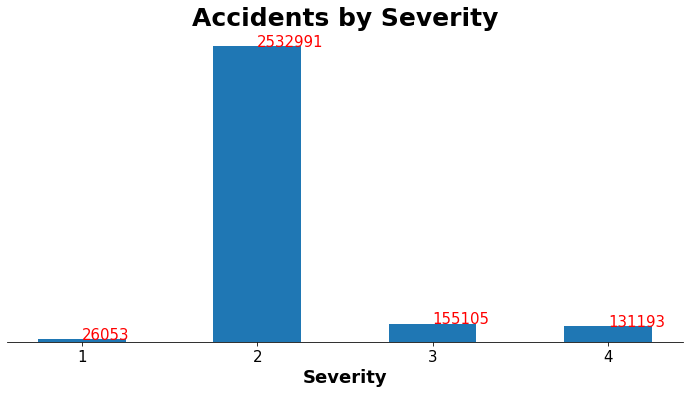

In [8]:
#Plot the Severity of the Accidents

sever = [26053, 2532991, 155105, 131193]
ind = ["1", "2", "3", "4"]
base_color= sb.color_palette()[0]

#Plot Chart showing the Severity of the Accident
#Creating a figure with some fig size
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(ind,sever, width=0.5, color=base_color)

for index,data in enumerate(sever):
    plt.text(x=index , y =data+40 , s=f"{data}", fontdict=dict(fontsize=15, color='r'))
plt.tight_layout()
sb.despine(top=True, right=True, left=True)
plt.title('Accidents by Severity', fontsize=25, fontweight='bold', color='black')

plt.xlabel('Severity', fontsize=18, fontweight='bold', color='black')
plt.xticks(fontsize=15)
plt.yticks(ticks=[])
plt.show()

Analysis of Accident by Severity: Severity 1 is showing the least accidents. While, Severity 3 & 4 have a high impact of accidents. And, Severity 2 has the highest number of accidents.

In [9]:
#convert datatype of(start_time, end_time) to datetime

df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [10]:
#Create New Columns

df['start_year'] = df['Start_Time'].dt.year
df['start_month'] = df['Start_Time'].dt.month_name()
df['start_hour'] = df['Start_Time'].dt.hour
df['start_day'] = df['Start_Time'].dt.day_name()

In [11]:
#Determine the Time Zones
df['Timezone'].value_counts().index

Index(['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain'], dtype='object')

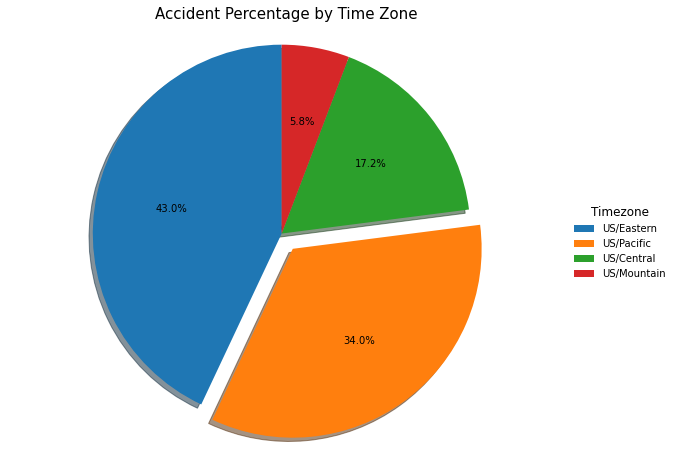

In [12]:
#Plot the Percentage of Accidents by Timezone

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0) 

fig, ax = plt.subplots(figsize=[10,8])
ax.pie(df['Timezone'].value_counts(), explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal') 
ax.legend(df['Timezone'].value_counts().index, title="Timezone",                                 
          loc="center left", title_fontsize=12,                                                                              
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10, frameon=False)                                    


ax.set_title("Accident Percentage by Time Zone", fontsize=15, loc='center', pad=None, y=1.0)


plt.show()

Analysis of Accidents by Timezone: The pie chart shows that the Eastern Time zone has the highest number of accidents by 43%.The Pacific Time zone as the second with a percentage of 34%.The Central Time zone as the third with a percentage of 17.2%. And Mountain Time zone with the least number of accidents by 5.8%

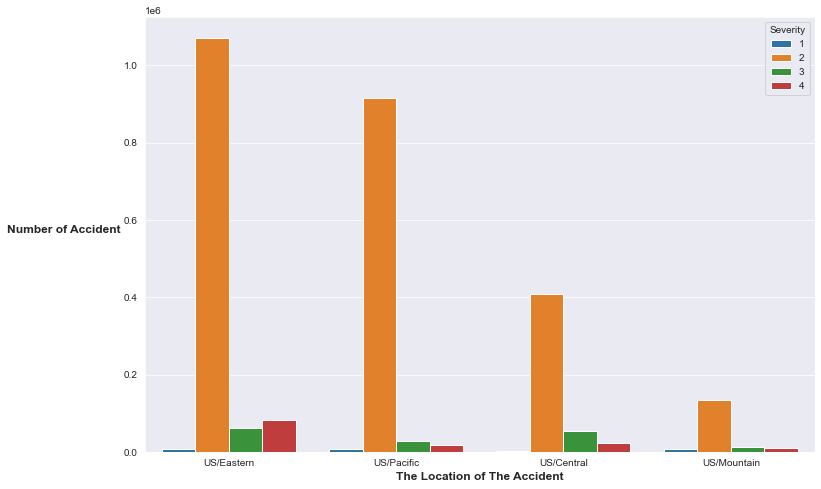

In [13]:
#Plot the Number of the Accidents by Severity and by TimeZone

sb.set_style('darkgrid')
plt.figure(figsize=[12,8])
sb.set_color_codes('dark')
sb.countplot(data=df, x='Timezone', hue='Severity',dodge=True)

plt.xlabel('The Location of The Accident', fontsize=12, fontweight='bold')
plt.ylabel('Number of Accident', fontsize=12, fontweight='bold', rotation=0, labelpad=60)
plt.show();

In [14]:
#Determine the Number of Accidents each Year
df.start_year.value_counts()

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: start_year, dtype: int64

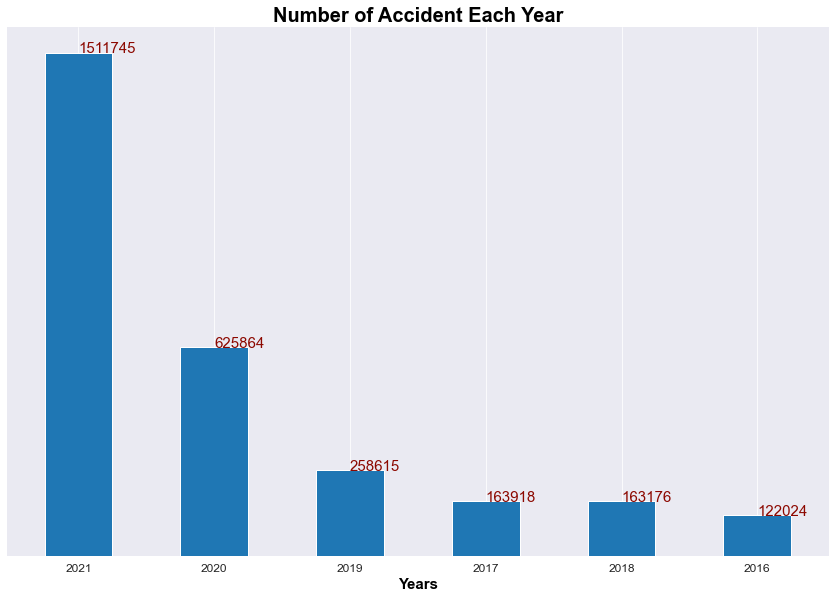

In [15]:
#Plot the Number of Accidents each Year

fig, ax = plt.subplots(figsize=[12,8])
year = ['2021', '2020', '2019', '2017', '2018', '2016']
value = [1511745, 625864, 258615, 163918, 163176, 122024]
ax.bar(year, value, width=0.5, color=base_color)
for index, data in enumerate(value):
    plt.text(x=index, y=data+5, s=f'{data}', fontdict=dict(fontsize=15, color='r'))
plt.tight_layout()
sb.despine(top=True, right=True, left=True)
plt.xlabel('Years', fontsize=15, fontweight='bold', color='black')

plt.title('Number of Accident Each Year',  fontweight='bold', fontsize=20, color='black')
plt.xticks(fontsize=12)
plt.yticks(ticks=[])

plt.show();

Analysis of the Number of Accidents Each Year: The chart is showing that the number of accidents is higher in the Year 2021 and the least in the Year of 2016.

In [16]:
#Determine the Trend of Accidents by Month
df.start_month.value_counts()

December     473943
November     360696
October      299131
September    241822
June         226561
January      198365
February     194995
May          181944
August       178670
April        171880
July         159111
March        158224
Name: start_month, dtype: int64

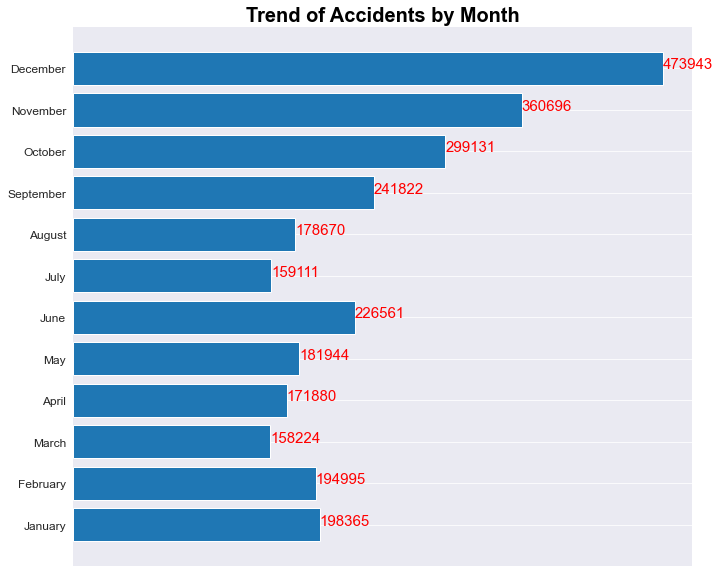

In [17]:
#Plot the Trend of Accidents by Month

fig, ax = plt.subplots(figsize=[10,8])
values = [198365, 194995, 158224, 171880, 181944, 226561, 159111, 178670, 241822, 299131, 360696, 473943]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October',
          'November','December']

ax.barh(months, values, color=base_color)
for index, data in enumerate(values):
    plt.text(y=index, x=data+5, s=f'{data}', fontdict=dict(fontsize=15, color='red'))
plt.tight_layout()
sb.despine(top=True, left=True, bottom=True)
plt.yticks(fontsize=12)
plt.xticks(ticks=[])

plt.title('Trend of Accidents by Month',  fontweight='bold', fontsize=20, color='black')
plt.show();

Analysis of the Trend of Accidents by Month: Monthly accidents are lowest in the month of March and July, followed by the month of April and August.While, monthly accidents increase by the month of June and September,and peak in the last quarter of the year.

In [18]:
#Determine the Trend of Accidents by Day
df.start_day.value_counts()

Friday       492074
Thursday     463477
Wednesday    455037
Tuesday      443968
Monday       419821
Saturday     311691
Sunday       259274
Name: start_day, dtype: int64

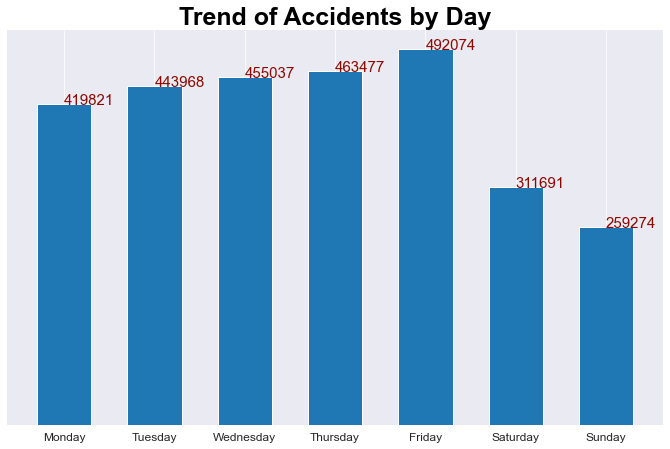

In [19]:
#Plot the Trend of Accidents by Day
fig, ax = plt.subplots(figsize=[10,6])
base_color= sb.color_palette()[0]
days = ['Monday','Tuesday','Wednesday','Thursday',
            'Friday','Saturday','Sunday']
counts = [419821, 443968, 455037, 463477, 492074, 311691, 259274]
ax.bar(days, counts, color=base_color, width=0.6)
for index, data in enumerate(counts):
    plt.text(x=index, y=data+10, s=f'{data}', fontdict=dict(fontsize=15, color='r'))
plt.tight_layout()
sb.despine(top=True, left=True, right=True)
plt.yticks(ticks=[])
plt.xticks(fontsize=12)
plt.title('Trend of Accidents by Day',  fontweight='bold', fontsize=25, color='black')
plt.show();

Analysis of Trend of Accidents by Day: Accidents are higher during weekdays increasing from Monday and highest during Friday.And relatively, lower accidents during weekends.

In [20]:
#Determine the Trend of Accidents by Hour
df.start_hour.value_counts()

17    220358
16    218385
15    214264
14    191480
18    168982
13    166473
12    143715
7     135191
8     130879
19    116911
11    113271
6     111160
9     108779
10    103926
20     94682
21     87078
22     81188
5      80303
23     74243
0      68800
1      59370
2      55443
4      51805
3      48656
Name: start_hour, dtype: int64

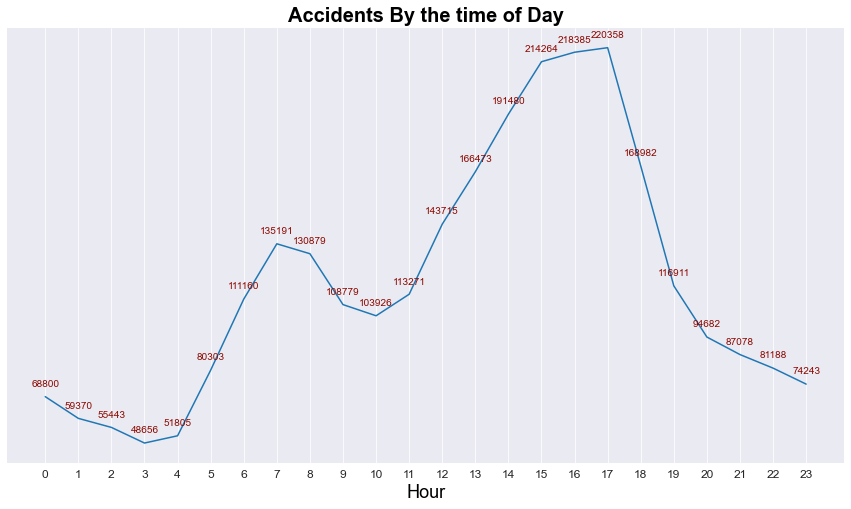

In [21]:
#Plot the Trend of Accidents by Hour
plt.figure(figsize=[15,8])
base_color= sb.color_palette()[0]
hours = ['0','1','2','3', '4','5','6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 
         '21', '22', '23']
counts = [68800, 59370, 55443, 48656, 51805, 80303, 111160, 135191, 130879, 108779, 103926, 113271, 143715, 166473, 
          191480, 214264, 218385, 220358, 168982, 116911, 94682, 87078, 81188, 74243]
plt.plot(hours, counts)
sb.despine(top=True, left=True, right=True)
for x,y in zip(hours, counts):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', color='r', fontsize=10)# horizontal alignment can be left, right or center
plt.xticks(fontsize=12)
plt.yticks(ticks=[])
plt.title('Accidents By the time of Day', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Hour', fontsize=18, color='black')
plt.show();

Analysis of the Trend of Accidents by Hour: Peak hours of the accidents are from 7 AM to 8 AM, and highest during 3 PM to 5 PM. The safest time to travel is from 3 AM to 4 AM.

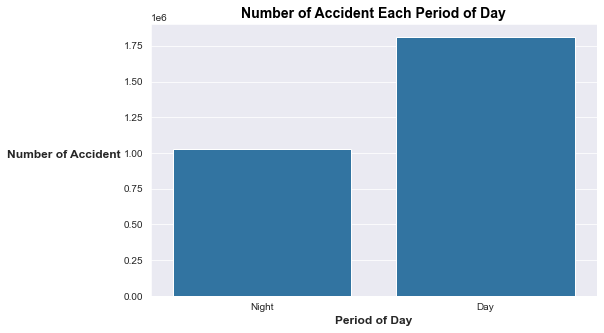

In [22]:
#Determine which period of the day has more accidents
plt.figure(figsize=[8,5])
base_color= sb.color_palette()[0]
sb.countplot(data= df, x = 'Sunrise_Sunset', color=base_color)
plt.xlabel('Period of Day', fontsize=12, fontweight='bold')
plt.ylabel('Number of Accident', fontsize=12, fontweight='bold', rotation=0, labelpad=60)
plt.title('Number of Accident Each Period of Day',  fontweight='bold', fontsize=14, color='black')
plt.show();

Analysis on which period of the day has more accidents: It is clear that the day period has more accidents than the night period.

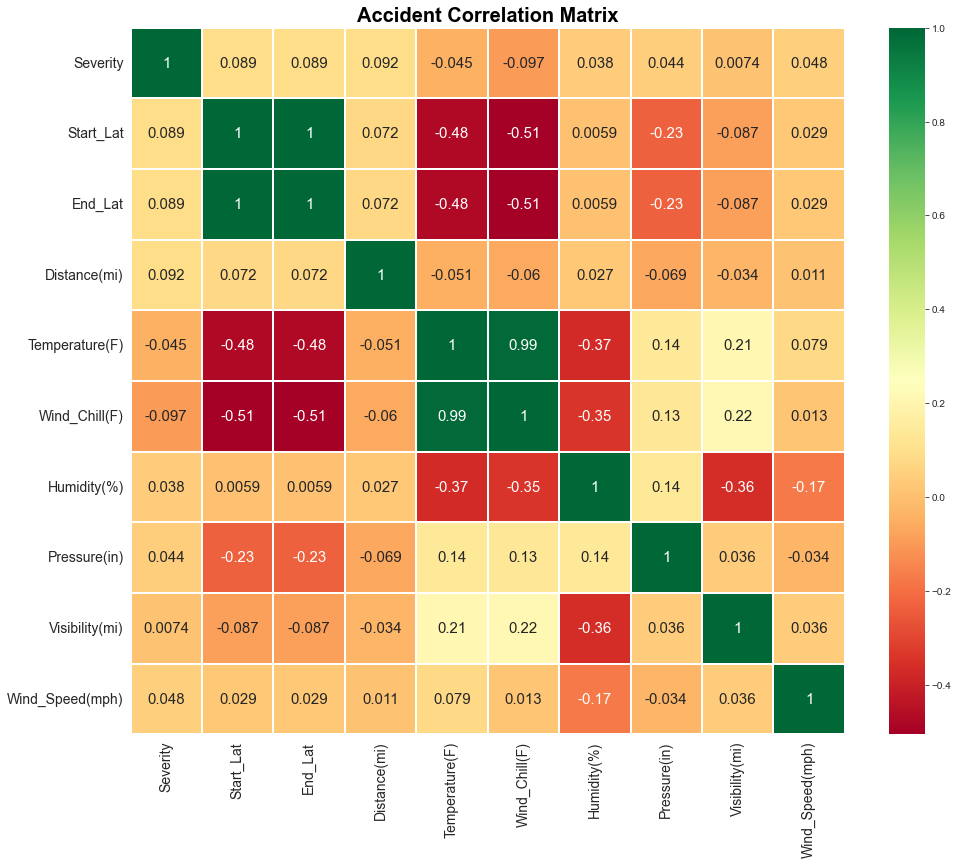

In [23]:
#Determine the Relationship of the Accident between the Various Factors

fig=sb.heatmap(df[['Severity', 'Start_Lat', 'End_Lat', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 
                   'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']].corr(), annot=True, cmap='RdYlGn', 
                  linewidths=0.2, annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(16,13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Accident Correlation Matrix', fontsize=20, fontweight='bold', color='black')
plt.show();

## Preprocessing

Data Preparation and Cleaning removing meaningless and unfair features.


In [24]:
df = pd.read_csv("./project_data/US_Accidents_Data Analysis.csv")

In [25]:
df1 = df

In [26]:
#Overall Information about the File
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [27]:
#Find missing values in the Dataset.
#true- if value is null or missing value
#false- if there is any value

df1.isnull()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2845338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2845339,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2845340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
#count null value
df1.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [29]:
df1.duplicated().sum()

0

In [30]:
#Sort the Missing Values in Descending Order

df1.isnull().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [31]:
#Get Numeric Data of Columns in the Dataset
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df1 = df1.select_dtypes(include=numerics)
len(numeric_df1.columns)

14

In [32]:
#Calculate the Percentage of Missing Values

missing_percentages=df1.isnull().sum().sort_values(ascending=False)/len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [33]:
type(missing_percentages) 

pandas.core.series.Series

<AxesSubplot:>

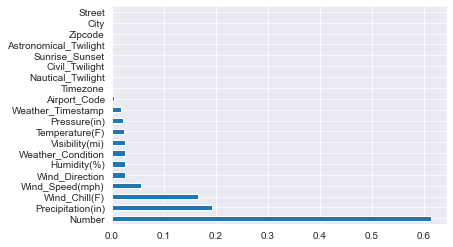

In [34]:
#Plot the missing data using horizantal bar and remove values of zeros in the columns.

missing_percentages[missing_percentages!=0].plot(kind='barh')

In [35]:
missing_percentages = df1.isnull().sum().reset_index()
missing_percentages.columns = ['Labels', 'Percentage']
missing_percentages['Percentage'] = missing_percentages['Percentage'].apply(lambda x: (x/df.shape[0])*100)
missing_percentages.loc[missing_percentages['Percentage'] > 0, :].sort_values(by=['Percentage'], ascending=False)

,Labels,Percentage
10,Number,61.290031
28,Precipitation(in),19.310789
22,Wind_Chill(F),16.505678
27,Wind_Speed(mph),5.550967
26,Wind_Direction,2.592834
23,Humidity(%),2.568830
29,Weather_Condition,2.482514
25,Visibility(mi),2.479350
21,Temperature(F),2.434646
24,Pressure(in),2.080593


Drop Columns with No Values in the Dataset: The following are the Number, Precipitation (in), Wind_Chill (F), Wind_Speed (mph), End_Lat, and End_Lng.

In [36]:
df1=df1.drop(['End_Lat', 'End_Lng', 'Precipitation(in)', 'Wind_Chill(F)', 'Number', 'Wind_Speed(mph)'], axis=1)

Drop Columns with null percentage which is less than 1: The following are the Astronomical_Twilight, Nautical_Twilight, Sunrise_Sunset, Civil_Twilight

In [37]:
df1=df1.dropna(subset=[ 'Astronomical_Twilight', 'Nautical_Twilight', 'Civil_Twilight', 'Sunrise_Sunset'])
df1

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,R,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,R,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,R,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,R,...,False,False,False,False,False,False,Day,Day,Day,Day


In [38]:
df1.dropna(axis=0, inplace=True)

In [39]:
df1.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
S

In [40]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [41]:
df1.shape

(2733639, 41)

In [42]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,...,0,0,0,0,0,0,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,...,0,0,0,0,0,0,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,...,0,0,0,0,0,0,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,...,0,0,0,0,0,0,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,...,0,0,0,0,0,0,Day,Day,Day,Day


In [43]:
df1['Sunrise_Sunset'] = label_encoder.fit_transform(df1['Sunrise_Sunset'])
df1['Civil_Twilight'] = label_encoder.fit_transform(df1['Civil_Twilight'])
df1['Nautical_Twilight'] = label_encoder.fit_transform(df1['Nautical_Twilight'])
df1['Astronomical_Twilight'] = label_encoder.fit_transform(df1['Astronomical_Twilight'])
df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
df1['Wind_Direction'] = label_encoder.fit_transform(df1['Wind_Direction'])
df1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,...,0,0,0,0,0,0,1,1,1,1
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,...,0,0,0,0,0,0,1,1,1,1
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,...,0,0,0,0,0,0,1,1,1,0
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,...,0,0,0,0,0,0,1,1,0,0
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Finalized DataFrame for Observation and Modeling
df2 = df1[['Severity', 'Distance(mi)', 'Temperature(F)','Humidity(%)','Pressure(in)',
              'Visibility(mi)']]
df2.head()

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi)
0,3,3.230,42.1,58.0,29.76,10.0
1,2,0.747,36.9,91.0,29.68,10.0
2,2,0.055,36.0,97.0,29.70,10.0
3,2,0.123,39.0,55.0,29.65,10.0
4,3,0.500,37.0,93.0,29.69,10.0


In [45]:
df2.columns

Index(['Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)'],
      dtype='object')

In [46]:
df2.shape

(2733639, 6)

## Split into Train & Test Datasets

Split dataset into features and class variables.

In [47]:
# set a seed for reproducibility
random_seed = 25
np.random.seed(random_seed)

In [48]:
df2 = df1[['Severity', 'Distance(mi)', 'Temperature(F)','Humidity(%)','Pressure(in)',
              'Visibility(mi)']]

In [49]:
from sklearn.model_selection import train_test_split
# The fraction of data that will be test data
test_data_fraction = 0.2

In [50]:
#Split data into features(X) and labels (Y)

# Grab all the columns except the last one
df2_features = df2.iloc[:,0:-1]

#Grab the first column
df2_labels = df2["Severity"]

In [51]:
# Generate the X/Y train/test datasets (4 total)
X_train, X_test, Y_train, Y_test = train_test_split(df2_features, df2_labels, test_size=test_data_fraction,  random_state=random_seed)

In [52]:
print("Training Shape")
print(X_train.shape)
print(Y_train.shape)

print("Testing Shape")
print(X_test.shape)
print(Y_test.shape)

# Making sure the shapes line up:
# There are 5 features in the X data and 1 class label in the Y
assert(X_test.shape[0]==np.ceil(test_data_fraction*df2_features.shape[0]))

Training Shape
(2186911, 5)
(2186911,)
Testing Shape
(546728, 5)
(546728,)


## Sampling

In [53]:
# Sample 100 rows from the subset Dataframe
df2_100 = df2.sample(n=100)
df2_100

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi)
1341777,2,0.344,91.0,63.0,29.93,10.0
406161,2,0.205,17.0,77.0,28.94,8.0
2322274,2,0.000,32.0,93.0,29.05,1.0
36422,3,0.173,69.1,87.0,30.09,10.0
2022685,2,0.004,57.0,87.0,30.02,10.0
...,...,...,...,...,...,...
1297834,2,0.148,80.0,69.0,29.92,10.0
1222384,2,0.427,82.0,56.0,30.06,10.0
1305412,2,0.214,78.0,36.0,25.67,9.0
32528,4,0.837,42.8,81.0,30.24,10.0


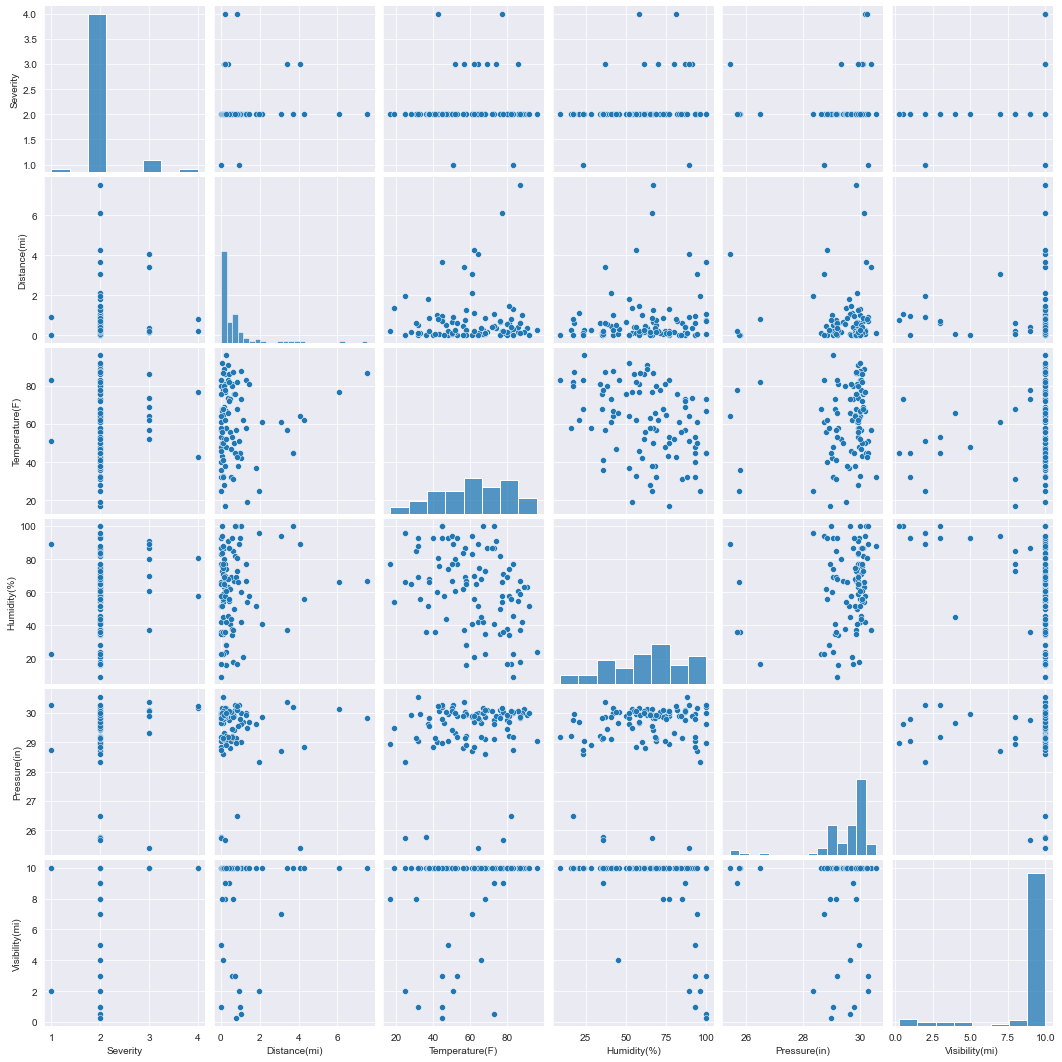

In [54]:
#Plot 100 Samples from the df2 Dataframe
sns.pairplot(df2_100)

Plot each subset of df2 Dataframe

<AxesSubplot:xlabel='Severity', ylabel='Count'>

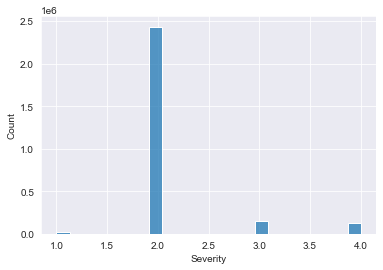

In [55]:
sns.histplot(df2['Severity'])

<AxesSubplot:xlabel='Distance(mi)', ylabel='Count'>

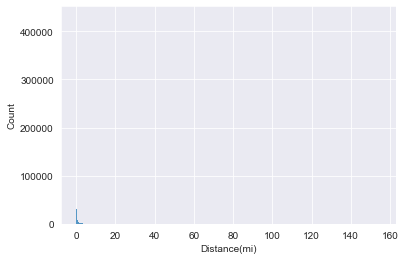

In [56]:
sns.histplot(df2['Distance(mi)'])

<AxesSubplot:xlabel='Temperature(F)', ylabel='Count'>

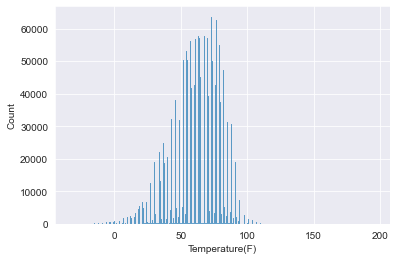

In [57]:
sns.histplot(df2['Temperature(F)'])

<AxesSubplot:xlabel='Humidity(%)', ylabel='Count'>

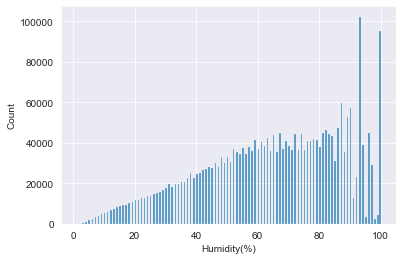

In [58]:
sns.histplot(df2['Humidity(%)'])

<AxesSubplot:xlabel='Pressure(in)', ylabel='Count'>

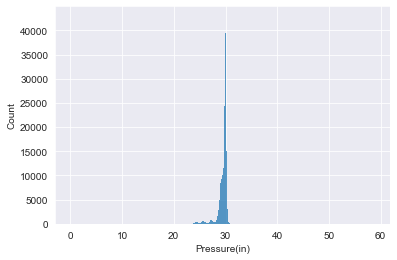

In [59]:
sns.histplot(df2['Pressure(in)'])

<AxesSubplot:xlabel='Visibility(mi)', ylabel='Count'>

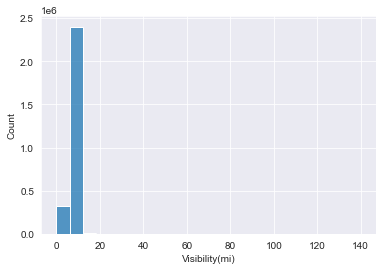

In [60]:
sns.histplot(df2['Visibility(mi)'])

In [61]:
#Plot Data Log Transformed
log_df2 = np.log(df2+1)

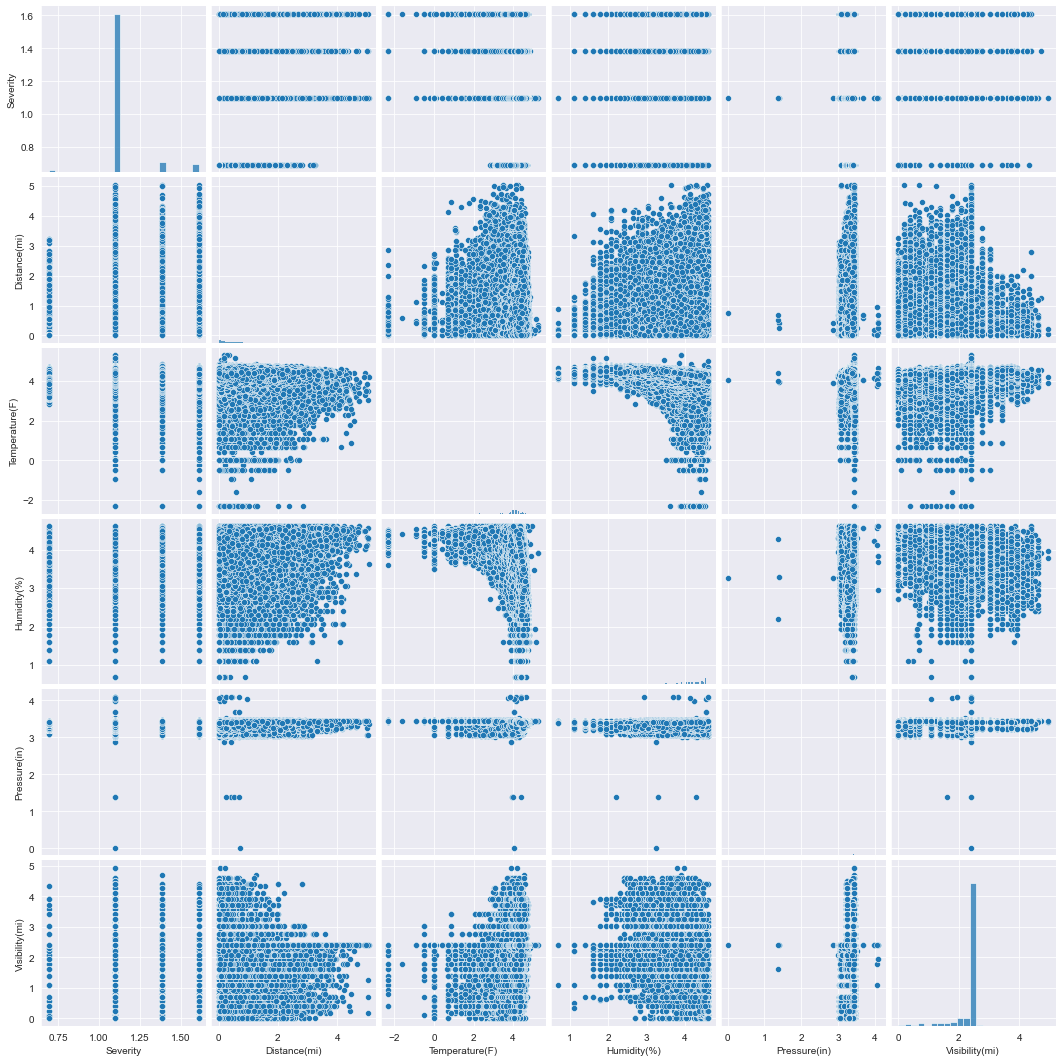

In [62]:
sns.pairplot(log_df2)

In [63]:
#Determine if there is any redundant highly correlated features
log_df2.corr(method="pearson")

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi)
Severity,1.000000,0.103749,-0.048257,0.047946,0.043581,-0.004899
Distance(mi),0.103749,1.000000,-0.064227,0.032138,-0.068152,-0.045013
Temperature(F),-0.048257,-0.064227,1.000000,-0.301371,0.150269,0.235067
Humidity(%),0.047946,0.032138,-0.301371,1.000000,0.176637,-0.294231
Pressure(in),0.043581,-0.068152,0.150269,0.176637,1.000000,0.059174
Visibility(mi),-0.004899,-0.045013,0.235067,-0.294231,0.059174,1.000000


## Vectorize df2 Dataframe

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
variables = df2[['Severity', 'Distance(mi)', 'Temperature(F)','Humidity(%)','Pressure(in)',
              'Visibility(mi)']]
variables.head()

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi)
0,3,3.230,42.1,58.0,29.76,10.0
1,2,0.747,36.9,91.0,29.68,10.0
2,2,0.055,36.0,97.0,29.70,10.0
3,2,0.123,39.0,55.0,29.65,10.0
4,3,0.500,37.0,93.0,29.69,10.0


## Analysis & Severity Predictive Model

## Supervised Learning as the Machine Learning Classification Used

## Train & Evaluate Models 

Classification with Decision Trees

I) Gini Index

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [67]:
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train)

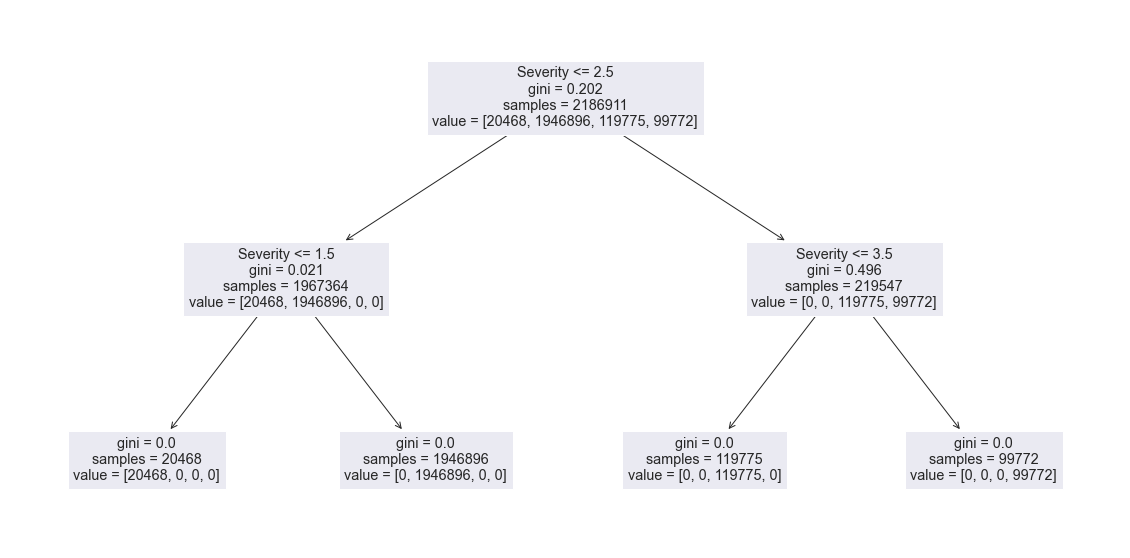

In [68]:
#Plot the resulting tree
plt.figure(figsize=(20,10))
_ = plot_tree(gini_tree, feature_names=df2_features.columns)

Calculate Training Accuracy

In [69]:
from sklearn.metrics import accuracy_score

Y_train_predicted = gini_tree.predict(X_train)
# The accuracy should be 100%
accuracy_score(Y_train, Y_train_predicted)

1.0

Calculate Test Accuracy

In [70]:
Y_test_predicted = gini_tree.predict(X_test)
accuracy_score(Y_test, Y_test_predicted)

1.0

II) Entropy

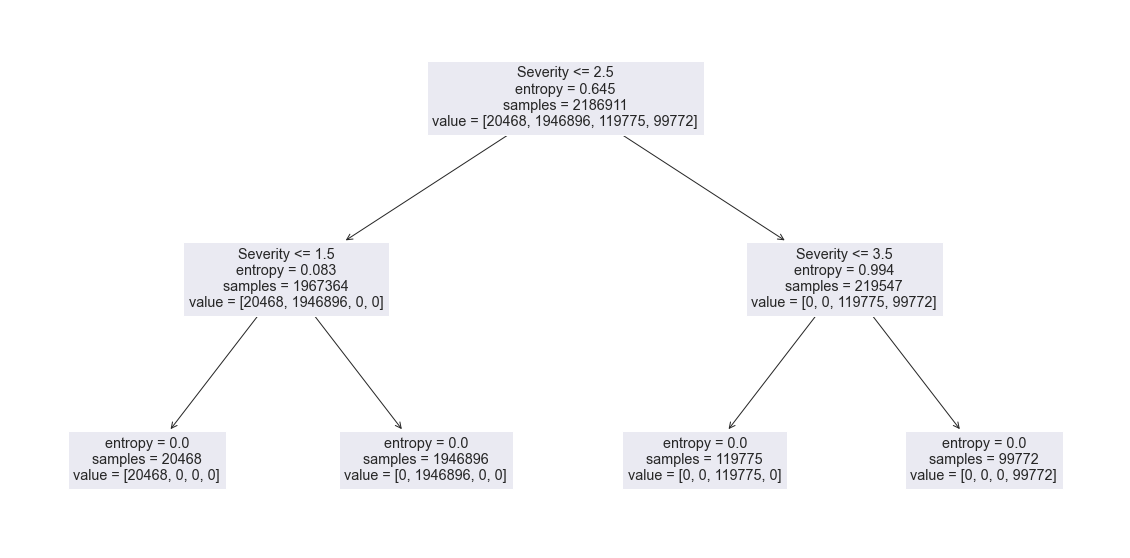

In [71]:
entropy_tree = DecisionTreeClassifier(criterion = "entropy", random_state=random_seed).fit(X=X_train, y=Y_train)
plt.figure(figsize=(20,10))
_ = plot_tree(entropy_tree, feature_names=df2_features.columns)

Calculate Test Accuracy for Entropy

In [72]:
from sklearn.metrics import accuracy_score
Y_predicted = entropy_tree.predict(X_test)
accuracy_score(Y_test, Y_predicted)

1.0

Conclusion: The test accuracy for Gini Index and Entropy for Decision Tree Classifier have the same result with 100% accuracy.

## Evaluation Metrics

Balanced Metrics

In [73]:
# set a seed for reproducibility
random_seed = 25
np.random.seed(random_seed)

In [74]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Dummy dataset which contains 500 positive and 500 negative samples
X,Y = make_classification(n_samples=1000,n_features=4,flip_y=0,random_state=random_seed)

test_data_fraction = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_data_fraction,  random_state=random_seed)

In [75]:
from sklearn.tree import DecisionTreeClassifier
Y_test_predicted = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
#sum(Y)/len(Y)

In [76]:
print(f'Accuracy: {sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)}')
print(f'Precision Macro: {sklearn.metrics.precision_score(Y_test, Y_test_predicted, average="macro")}')
print(f'Recall Macro: {sklearn.metrics.recall_score(Y_test, Y_test_predicted, average="macro")}')
print(f'F1 Macro: { sklearn.metrics.f1_score(Y_test, Y_test_predicted, average="macro") }')

Accuracy: 0.92
Precision Macro: 0.9184393588063313
Recall Macro: 0.9201336167628302
F1 Macro: 0.9191919191919192


In [77]:
# Since the dataset is balanced in terms of class distribution, all of the micro scores are the same as the accuracy
print(f'Precision Micro: {sklearn.metrics.precision_score(Y_test, Y_test_predicted, average="micro")}')
print(f'Recall Micro: {sklearn.metrics.recall_score(Y_test, Y_test_predicted, average="micro")}')
print(f'F1 Micro: { sklearn.metrics.f1_score(Y_test, Y_test_predicted, average="micro") }')

Precision Micro: 0.92
Recall Micro: 0.92
F1 Micro: 0.92


In [78]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_test_predicted,digits=4))

              precision    recall  f1-score   support

           0     0.9358    0.9189    0.9273       111
           1     0.9011    0.9213    0.9111        89

    accuracy                         0.9200       200
   macro avg     0.9184    0.9201    0.9192       200
weighted avg     0.9203    0.9200    0.9201       200



In [79]:
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
Y_test_predicted = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=Y_train).predict(X_test)
print("KNN Classifer")
print(classification_report(Y_test,Y_test_predicted,digits=4))

KNN Classifer
              precision    recall  f1-score   support

           0     0.9907    0.9550    0.9725       111
           1     0.9462    0.9888    0.9670        89

    accuracy                         0.9700       200
   macro avg     0.9684    0.9719    0.9698       200
weighted avg     0.9709    0.9700    0.9701       200



In [80]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
Y_test_predicted = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Adaboost Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Adaboost Classifier
              precision    recall  f1-score   support

           0     0.9537    0.9279    0.9406       111
           1     0.9130    0.9438    0.9282        89

    accuracy                         0.9350       200
   macro avg     0.9334    0.9359    0.9344       200
weighted avg     0.9356    0.9350    0.9351       200



In [81]:
import warnings
warnings.filterwarnings('ignore')

# Dummy Classifier (Picks the majority class. Every time.)
from sklearn.dummy import DummyClassifier
Y_test_predicted = DummyClassifier(strategy="most_frequent", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Dummy Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Dummy Classifier
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       111
           1     0.4450    1.0000    0.6159        89

    accuracy                         0.4450       200
   macro avg     0.2225    0.5000    0.3080       200
weighted avg     0.1980    0.4450    0.2741       200



Determine Imbalanced Data

In [82]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

df2 = MinMaxScaler().fit_transform(df2)

df2 = df1[['Severity', 'Distance(mi)', 'Temperature(F)','Humidity(%)','Pressure(in)',
              'Visibility(mi)']]
df2.head()

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi)
0,3,3.230,42.1,58.0,29.76,10.0
1,2,0.747,36.9,91.0,29.68,10.0
2,2,0.055,36.0,97.0,29.70,10.0
3,2,0.123,39.0,55.0,29.65,10.0
4,3,0.500,37.0,93.0,29.69,10.0


In [83]:
test_data_fraction = 0.2
df2_features = df2.iloc[:,0:-1]
df2_labels = df2["Severity"]
X_train, X_test, Y_train, Y_test = train_test_split(df2_features, df2_labels, test_size=test_data_fraction,  random_state=random_seed)

In [84]:
df2["Severity"].value_counts()

2    2434374
3     149224
4     124542
1      25499
Name: Severity, dtype: int64

Determine evaluation metrics for Decision Trees, KNN, Adaboost, and the Dummy Classifier.

In [85]:
# Decision Tree

Y_test_predicted = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Decision Tree")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Decision Tree
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000      5031
           2     1.0000    1.0000    1.0000    487478
           3     1.0000    1.0000    1.0000     29449
           4     1.0000    1.0000    1.0000     24770

    accuracy                         1.0000    546728
   macro avg     1.0000    1.0000    1.0000    546728
weighted avg     1.0000    1.0000    1.0000    546728



In [86]:
# K-Nearest Neighbor Classifier

from sklearn.neighbors import KNeighborsClassifier
Y_test_predicted = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=Y_train).predict(X_test)
print("KNN Classifer")
print(classification_report(Y_test,Y_test_predicted,digits=4))

KNN Classifer
              precision    recall  f1-score   support

           1     0.9974    0.8519    0.9190      5031
           2     0.9947    0.9997    0.9972    487478
           3     0.9841    0.9457    0.9645     29449
           4     0.9930    0.9686    0.9806     24770

    accuracy                         0.9941    546728
   macro avg     0.9923    0.9415    0.9653    546728
weighted avg     0.9940    0.9941    0.9940    546728



In [87]:
# AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
Y_test_predicted = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Adaboost Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Adaboost Classifier
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000      5031
           2     1.0000    1.0000    1.0000    487478
           3     1.0000    1.0000    1.0000     29449
           4     1.0000    1.0000    1.0000     24770

    accuracy                         1.0000    546728
   macro avg     1.0000    1.0000    1.0000    546728
weighted avg     1.0000    1.0000    1.0000    546728



In [88]:
# Dummy Classifier

from sklearn.dummy import DummyClassifier
Y_test_predicted = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Dummy Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Dummy Classifier
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000      5031
           2     1.0000    1.0000    1.0000    487478
           3     1.0000    1.0000    1.0000     29449
           4     1.0000    1.0000    1.0000     24770

    accuracy                         1.0000    546728
   macro avg     1.0000    1.0000    1.0000    546728
weighted avg     1.0000    1.0000    1.0000    546728



Determine MultiClass Data

In [89]:
df2 = df1[['Severity', 'Distance(mi)', 'Temperature(F)','Humidity(%)','Pressure(in)',
              'Visibility(mi)']]

In [90]:
from sklearn.model_selection import train_test_split
# The fraction of data that will be test data
test_data_fraction = 0.90

df2_features = df2.iloc[:,0:-1]
df2_labels = df2["Severity"]
X_train, X_test, Y_train, Y_test = train_test_split(df2_features, df2_labels, test_size=test_data_fraction,  random_state=random_seed)

In [91]:
df2["Severity"].value_counts()

2    2434374
3     149224
4     124542
1      25499
Name: Severity, dtype: int64

In [92]:
from sklearn.metrics import confusion_matrix

Y_test_predicted = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)

confusion_matrix(Y_test, Y_test_predicted)

array([[  22856,       0,       0,       0],
       [      0, 2191137,       0,       0],
       [      0,       0,  134308,       0],
       [      0,       0,       0,  111975]], dtype=int64)

In [93]:
# Decision Tree

Y_test_predicted = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Decision Tree")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Decision Tree
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000     22856
           2     1.0000    1.0000    1.0000   2191137
           3     1.0000    1.0000    1.0000    134308
           4     1.0000    1.0000    1.0000    111975

    accuracy                         1.0000   2460276
   macro avg     1.0000    1.0000    1.0000   2460276
weighted avg     1.0000    1.0000    1.0000   2460276



In [94]:
# K-Nearest Neighbor Classifier

from sklearn.neighbors import KNeighborsClassifier
Y_test_predicted = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=Y_train).predict(X_test)
print("KNN Classifer")
print(classification_report(Y_test,Y_test_predicted,digits=4))

KNN Classifer
              precision    recall  f1-score   support

           1     0.9736    0.3825    0.5493     22856
           2     0.9771    0.9992    0.9880   2191137
           3     0.9240    0.7835    0.8480    134308
           4     0.9877    0.8513    0.9144    111975

    accuracy                         0.9750   2460276
   macro avg     0.9656    0.7542    0.8249   2460276
weighted avg     0.9746    0.9750    0.9730   2460276



In [95]:
# AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
Y_test_predicted = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Adaboost Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Adaboost Classifier
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000     22856
           2     1.0000    1.0000    1.0000   2191137
           3     1.0000    1.0000    1.0000    134308
           4     1.0000    1.0000    1.0000    111975

    accuracy                         1.0000   2460276
   macro avg     1.0000    1.0000    1.0000   2460276
weighted avg     1.0000    1.0000    1.0000   2460276



In [96]:
# Dummy Classifier

from sklearn.dummy import DummyClassifier
Y_test_predicted = DummyClassifier(strategy="most_frequent", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Dummy Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Dummy Classifier
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000     22856
           2     0.8906    1.0000    0.9421   2191137
           3     0.0000    0.0000    0.0000    134308
           4     0.0000    0.0000    0.0000    111975

    accuracy                         0.8906   2460276
   macro avg     0.2227    0.2500    0.2355   2460276
weighted avg     0.7932    0.8906    0.8391   2460276



Cross Validation

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [98]:
# Initialize a k-fold splitter
kf = KFold(n_splits=3)

In [99]:
# Kf.split() allows you to iterate though the different folds
# "train_index" are the indecies of the training data in that fold
# "test_index" are the indicies of the testing data in that fold
print(len(X_train))
for train_index, test_index in kf.split(X_train):
    print("Train: ", train_index)
    print("Test: ", test_index)
    print("----")

273363
Train:  [ 91121  91122  91123 ... 273360 273361 273362]
Test:  [    0     1     2 ... 91118 91119 91120]
----
Train:  [     0      1      2 ... 273360 273361 273362]
Test:  [ 91121  91122  91123 ... 182239 182240 182241]
----
Train:  [     0      1      2 ... 182239 182240 182241]
Test:  [182242 182243 182244 ... 273360 273361 273362]
----


In [100]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

df2 = df1[['Severity', 'Distance(mi)', 'Temperature(F)','Humidity(%)','Pressure(in)',
              'Visibility(mi)']]
df2.head()

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi)
0,3,3.230,42.1,58.0,29.76,10.0
1,2,0.747,36.9,91.0,29.68,10.0
2,2,0.055,36.0,97.0,29.70,10.0
3,2,0.123,39.0,55.0,29.65,10.0
4,3,0.500,37.0,93.0,29.69,10.0


In [101]:
# Formatting the Data
test_data_fraction = 0.2
df2_features = df2.iloc[:,0:-1]
df2_labels = df2["Severity"]
X_train, X_test, Y_train, Y_test = train_test_split(df2_features, df2_labels, test_size=test_data_fraction,  random_state=random_seed)

In [102]:
def k_fold_accuracy(k, model, X_data, Y_data):
    
    # Init k-fold splitter
    kf = KFold(n_splits=k)
    scores = []
    
    for train_index, test_index in kf.split(X_data):
        
        # Splits the given data into a training/validation set
        k_X_train, k_X_valid = X_data.iloc[train_index], X_data.iloc[test_index]
        k_Y_train, k_Y_valid = Y_data.iloc[train_index], Y_data.iloc[test_index]

        # Fits and runs the model
        model_fit = model.fit(X=k_X_train, y=k_Y_train)
        k_Y_valid_predicted=model_fit.predict(k_X_valid)

        acc_score = sklearn.metrics.accuracy_score(k_Y_valid, k_Y_valid_predicted)
        scores.append(acc_score)

    return scores

In [103]:
# Testing K-fold
k = 3
model = DecisionTreeClassifier(criterion = "gini", random_state=random_seed)
per_fold_acc = k_fold_accuracy(k, model, X_train, Y_train)
print(per_fold_acc)
np.mean(per_fold_acc)

[1.0, 1.0, 1.0]


1.0

In [104]:
from sklearn import metrics
# Split data into training and validation sets for each fold
# In order to get an "unbiased" estimate of the test performance.
per_fold_acc = cross_val_score(model, X_train, Y_train, cv=KFold(n_splits=k), scoring='accuracy')
print(per_fold_acc)
np.mean(per_fold_acc)

[1. 1. 1.]


1.0

Tuning

Text(0, 0.5, 'Average Accuracy of 5-fold validation')

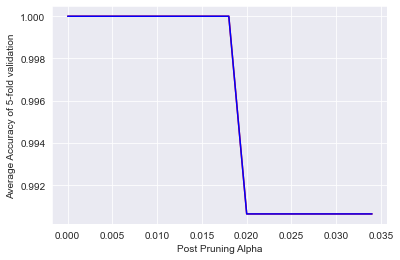

In [105]:
from sklearn.metrics import accuracy_score

# np.arange generates a list that starts at minimum, ends at maximum, and increments by step
alpha_values = np.arange(0, 0.035, 0.002)

# two lists to hold our accuracy
k = 5
valid_accs = []
train_accs = []

for ccp_alpha in alpha_values:
    # at every ccp_alpha value, get the training and test accuracy
    model = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=ccp_alpha)
    valid_acc = np.mean(k_fold_accuracy(k, model, X_train, Y_train))
    valid_accs.append(valid_acc)
    train_accs.append(accuracy_score(Y_train, model.fit(X_train, Y_train).predict(X_train)))

plt.plot(alpha_values, valid_accs, color='red')
plt.plot(alpha_values, train_accs, color='blue')
plt.xlabel("Post Pruning Alpha")
plt.ylabel(f'Average Accuracy of {k}-fold validation')

In [106]:
# Take the alpha for the model with the best accuracy on the *validation* set!
best_alpha = alpha_values[np.argmax(valid_accs)]
best_alpha

0.0

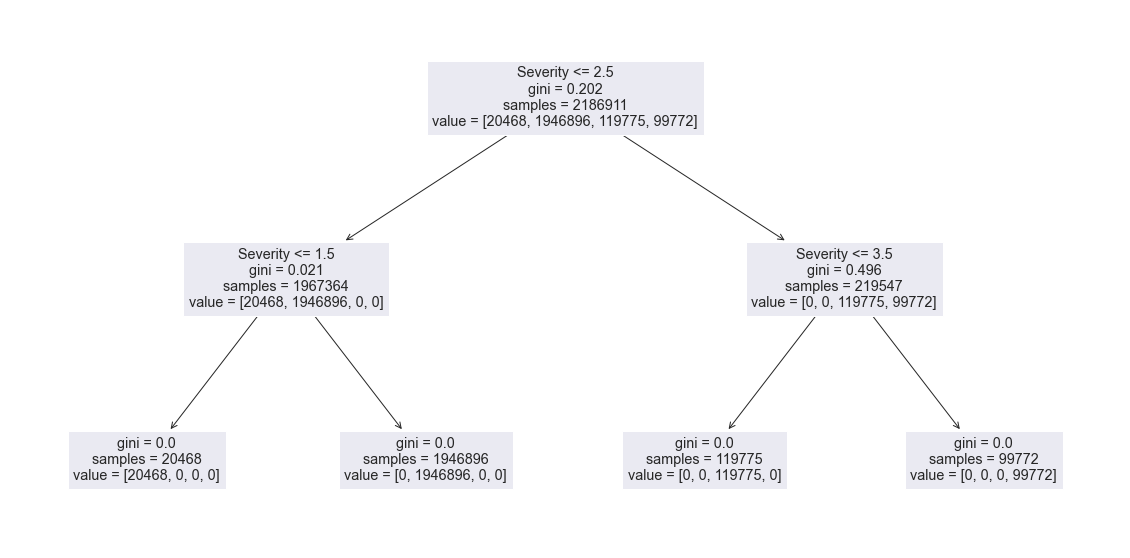

In [107]:
# Plot Tree

from sklearn.tree import plot_tree
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=best_alpha).fit(X=X_train, y=Y_train)

plt.figure(figsize=(20,10))
_ = plot_tree(gini_tree, feature_names=df2_features.columns)

In [108]:
# Determine Evaluation Metrics

Y_test_predicted = gini_tree.predict(X_test)
sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)

1.0

## Supervised Learning as the Machine Learning Classification Used
## Prediction Algorithm Models Used

1) Decision Tree
2) Random Forest
3) AdaBoost
4) Logistic Regression
5) Multi-Layer Perceptron Regression
6) Linear Regression
7) KNN Regression
8) SVR (Support Vector Regression)

### Decision Tree Classifier

In [113]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.3, random_state=120)

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

,0,1,2,3
0,-0.203091,-0.111162,-0.293317,0.104748
1,-0.001093,-0.297537,0.855510,-0.770368
2,-0.278715,-0.486152,0.560365,-0.722356
3,0.013996,0.200880,-0.537497,0.494429
4,-1.704167,-1.925353,0.403726,-1.698039


In [116]:
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

In [117]:
clf = DecisionTreeClassifier(random_state = 120, criterion="entropy", max_depth=4)

In [118]:
clf = clf.fit(scalar_train,y_train)

In [119]:
y_pred = clf.predict(scalar_test)

In [120]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9066666666666666


### Random Forest Classifier

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

,0,1,2,3
0,1.046262,1.589494,-1.443973,2.078434
1,1.541541,1.162979,1.245273,0.063504
2,0.146895,0.347459,-0.558321,0.607972
3,-0.136613,-0.102506,-0.111955,-0.004208
4,-2.247533,-1.901240,-1.227270,-0.615668


In [123]:
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
clf=RandomForestClassifier(n_estimators=100)

In [126]:
clf.fit(scalar_train,y_train)

RandomForestClassifier()

In [127]:
y_pred=clf.predict(scalar_test)

In [128]:
from sklearn import metrics

In [129]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9233333333333333


### Adaboost Classifier

In [130]:
# Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.08)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9466666666666667


### Logistic Regression

In [137]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=120, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_train, y_train)

0.9314285714285714

### Multi Layer Perceptron Classifier

In [138]:
from sklearn.neural_network import MLPClassifier

random_state = 42

In [139]:
clf = MLPClassifier(random_state=random_state, max_iter=20)
clf.fit(X_train, y_train)

MLPClassifier(max_iter=20, random_state=42)

In [140]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [141]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[150,  14],
       [  3, 133]], dtype=int64)

In [142]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9433333333333334


### Plot the Prediction Algorithm Used

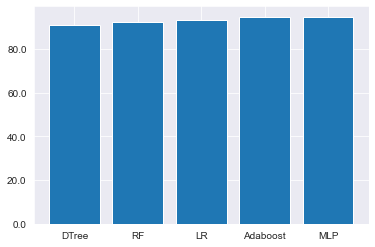

In [143]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
accuracy = [90.66, 92.33, 93.14, 94.66, 94.33]


def millions(x, pos):
    'The two args are the value and tick position'
    return (x )


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, accuracy)
plt.xticks(x, ('DTree', 'RF', 'LR', 'Adaboost', 'MLP'))
plt.show()

Analysis: Based on the graph, Adaboost has the highest accuracy of 94.66% followed by MLP with 94.33% accuracy.

## Feature Reduction
Principle Component Analysis (PCA)

In [144]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X)
train_img = pca.transform(X)
train = pd.DataFrame(train_img)
train.head()

,0,1
0,-1.896126,-0.282548
1,-1.826535,-0.689851
2,0.741454,0.496744
3,-1.183867,1.844902
4,1.146537,0.102799


In [145]:
train.shape

(1000, 2)

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.2, random_state=42)

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
#test_img = scaler.transform(test_img)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

,0,1
0,0.493903,0.370883
1,-0.012814,0.310057
2,0.361543,0.336480
3,0.424060,-1.484300
4,-0.463676,0.246039


## Determine Different Models

### Linear Regression

In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
reg = LinearRegression().fit(X_train, y_train)

In [150]:
print("Training score", reg.score(X_train,y_train))
print("Testing score:", reg.score(X_test,y_test))

Training score 0.6202175109339945
Testing score: 0.6391462223993835


### KNN Regression

In [151]:
from sklearn.neighbors import KNeighborsRegressor

In [152]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

Evaluate the testing set.

In [153]:
print("Testing score:", neigh.score(X_test,y_test))

Testing score: 0.8199279711884754


### Multi Layer Perceptron Regression

In [154]:
from sklearn.neural_network import MLPRegressor

In [155]:
nn = MLPRegressor(max_iter=45, hidden_layer_sizes = (300,100,50,10))
nn.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(300, 100, 50, 10), max_iter=45)

In [156]:
nn.score(X_train,y_train)

0.8366100785472347

In [157]:
nn.score(X_test,y_test)

0.8137608983039608

## Hyperparameter Tuning
Determine hyperparams for our KNN model.

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
def find_best_hyperparameters(X_train, y_train):
    """
    Input: The training X features and Y labels/values
    Output: The classifier with the best hyperparams, the predictions
    """
    neigh = KNeighborsRegressor()
    param_grid = {"n_neighbors": [1,2],
                  "p": [1,2]}
    
    # Warning, takes a while!
    search = GridSearchCV(neigh, param_grid)
    search.fit(X_train,y_train)
    return search, search.predict(X_test)

In [160]:
best_model, predictions = find_best_hyperparameters(X_train, y_train)

In [161]:
best_model

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2], 'p': [1, 2]})

In [162]:
predictions

array([1. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 1. , 1. , 0. , 0. , 0. ,
       0. , 1. , 1. , 0. , 0. , 1. , 1. , 0. , 1. , 0.5, 0. , 0.5, 0. ,
       1. , 0. , 0. , 1. , 1. , 1. , 0. , 1. , 0. , 1. , 1. , 1. , 0. ,
       1. , 0. , 0.5, 1. , 1. , 0. , 1. , 0. , 0. , 0. , 1. , 1. , 1. ,
       0. , 0. , 1. , 0. , 0. , 1. , 1. , 1. , 0. , 0. , 1. , 0. , 1. ,
       0.5, 1. , 0. , 1. , 1. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. ,
       1. , 0. , 1. , 1. , 1. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 1. ,
       0.5, 1. , 0. , 0. , 1. , 0.5, 0. , 0. , 0.5, 0. , 1. , 1. , 1. ,
       1. , 1. , 1. , 0. , 1. , 1. , 0. , 0. , 1. , 0. , 0. , 0.5, 0. ,
       0. , 0. , 1. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0.5, 0. , 1. ,
       1. , 1. , 1. , 0. , 0. , 0.5, 1. , 1. , 0. , 0. , 0. , 0. , 1. ,
       0. , 0. , 1. , 1. , 1. , 0. , 0.5, 0. , 1. , 1. , 0. , 1. , 1. ,
       0. , 0. , 0. , 0. , 1. , 0. , 1. , 0. , 1. , 0. , 1. , 1. , 1. ,
       0. , 0.5, 1. , 1. , 0. , 0.5, 1. , 0.5, 0. , 1. , 1. , 0.

## Evaluation of Models

In [166]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

"""
Evaluates regression using MAE,MSE, and R^2
"""
def evaluate_regression(model,x_test_ev,y_test_ev):
    predictions = model.predict(x_test_ev)
    mae = mean_absolute_error(y_test_ev,predictions)
    mse = mean_squared_error(y_test_ev,predictions)
    r2 = r2_score(y_test_ev,predictions)
    return {"mae":mae,"mse":mse,"r2":r2}
    

In [167]:
def evaluate_random(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    
    evals = evaluate_regression(model,X_test,y_test)
    
    return evals

In [168]:
from sklearn.model_selection import train_test_split

"""
Input:
    X: Your features
    y: Your target
    models: A list of the models that you are evaluating
    n_trials (opt): The number of random trials
    
Output:
    A dataframe with three colums and len(models)*n_trials*(number of evaluation metrics) rows.
    Each row represents a single random evaluation.
    
    Model: The name of the model being evaluated
    Evaluation: The name of the evaluation (e.g. acc, precision, MSE)
    Score: The score of the evaluation
"""
def get_scores(X,y,models,n_trials=5):
    
    data = {
        "model": [],
        "evaluation": [],
        "score": [],
    }
    
    for n in range(n_trials):
        for model in models:
            X_train,X_test,y_train,y_test = train_test_split(X,y)
            
            scaler = MinMaxScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
            
            scores = evaluate_random(model,X_train,y_train,X_test,y_test)
            
            for key in scores:
                data["model"].append(str(model))
                data["evaluation"].append(key)
                data["score"].append(scores[key])
    
    return pd.DataFrame.from_dict(data)
        

## Model Comparison

In [169]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

In [170]:
X, y = load_boston(return_X_y=True)

In [171]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_state)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

In [172]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression().fit(X_train,y_train)
evaluate_regression(lreg,X_test,y_test)

{'mae': 3.0609395954370338, 'mse': 22.098694827098, 'r2': 0.6844267283527129}

### Support Vector Regression (SVR)

In [173]:
from sklearn.svm import SVR
svr = SVR(C=10,kernel="rbf").fit(X_train,y_train)
evaluate_regression(svr,X_test,y_test)

{'mae': 2.2105499427938087,
 'mse': 15.198266473921421,
 'r2': 0.7829660660021661}

### Multi Layer Perceptron Regression (MLP)

In [174]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=1000).fit(X_train,y_train)
evaluate_regression(mlp,X_test,y_test)

{'mae': 3.0788225699386618, 'mse': 23.10595015830091, 'r2': 0.6700429440279436}

In [175]:
scores = get_scores(X,y,[lreg,svr,mlp],n_trials=5)

In [176]:
scores.head()

,model,evaluation,score
0,LinearRegression(),mae,3.323205
1,LinearRegression(),mse,20.033783
2,LinearRegression(),r2,0.781908
3,SVR(C=10),mae,2.175498
4,SVR(C=10),mse,12.379090


## Plot the results of the Models

Text(0.5, 1.0, 'R^2 Comparision')

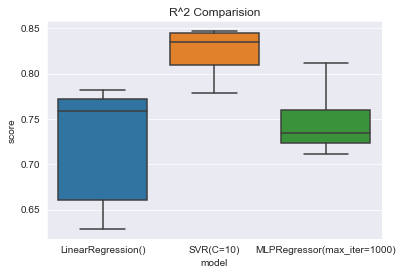

In [177]:
ax = sns.boxplot(x="model",y="score",data=scores[scores["evaluation"]=="r2"])
ax.set_title("R^2 Comparision")

Text(0.5, 1.0, 'MAE Comparision')

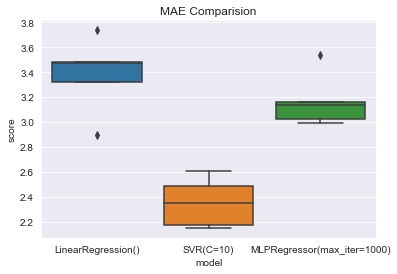

In [178]:
ax = sns.boxplot(x="model",y="score",data=scores[scores["evaluation"]=="mae"])
ax.set_title("MAE Comparision")

Text(0.5, 1.0, 'MSE Comparision')

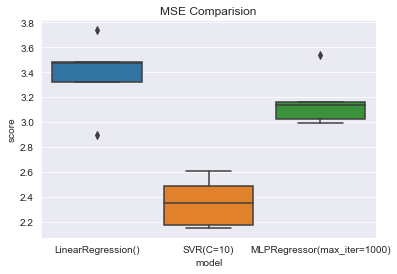

In [179]:
ax = sns.boxplot(x="model",y="score",data=scores[scores["evaluation"]=="mae"])
ax.set_title("MSE Comparision")

## Technical Retrospective

Linear Regression Coefficients

In [180]:
lreg.coef_

array([-11.59798121,   4.8669197 ,   1.7709272 ,   3.04955471,
        -8.85471229,  18.07674011,  -0.37849699, -15.77220089,
         6.57480268,  -5.67717887,  -8.82880853,   3.36289111,
       -18.42571732])

## Conclusion

The objective of the prediction model is to predict the value of ‘Severity’ which is used to measure accurately to predict the impact and cause of accidents in different timezones yearly, monthly, weekly, and each day with a measure having values from 1 to 4.

The Machine Learning Prediction Model used is supervised learning with 8 different algorithm models namely; Decision Tree, KNN, Random Forest, Logistic Regression, AdaBoost., Multi Layer Perceptron, Linear Regression, and Support Vector Regression (SVR). The datasets consist of 47 original attributes and dropped attributes with meaningless features and values. Out of 47 attributes, 20 have categorical values and ended up with only 5 derived attributes to be used for training and test.

Based on the final results in the graph, Adaboost has the highest accuracy of 94.66%, followed by MLP with 94.33% accuracy and Logistic Regression with 93.14%. Decision Tree has 90.66% and Random Forest with 92.33%.

On the other hand in determination of the other different models, KNN Regression has the highest testing score with 81.99%. Followed by MLP regression with 81.37% then, Linear Regression of 63.91%.

Based on the final results in the graph, AdaBoost yields the best results to boost the performance based on the accuracy results in comparison with the other prediction algorithm models used such as Decision Tree, Random Forest, Logistic Regression, and Multi Layer Perceptron. Adaboost with decision trees yields in the evaluation metrics for Imbalanced and Multi-class data with 100% accuracy as well. This algorithm gives the best possible outcome when it is used alongside weak learners and it is slightly better at predicting a classification output as compared to a random guess. Thus, Adaboost is the best suited and widely used algorithm to use with decision trees with a single level.

However, SVR performs better performance prediction than the rest of the other algorithms based on the evaluation results in mean absolute error (mae), mean squared error (mse), and r^2 results. SVR fits to be the best algorithm model which allows to model non-linear relationships between variables with improved optimization strategies and provides the flexibility to adjust the model’s robustness by tuning hyperparameters

